In [37]:
URL_PREPARED_DATA = 'Prepared_Data/'
FILE_NAME = 'siniestros-train.csv'

In [38]:
dfsiniestros = pd.read_csv(URL_PREPARED_DATA+FILE_NAME)

In [39]:
dfsiniestros.columns

Index(['DIA_PROCESADO', 'EDAD_PROCESADA', 'LLEVACINTURON', 'LLEVACHALECO',
       'LLEVACASCO', 'SEXO', 'MODELOVEHICULO', 'CLASEVEHICULO',
       'POSSESEGURORESPONSABILIDAD', 'CON_EMBRIAGUEZ', 'CON_HUECOS',
       'LOCALIDAD', 'HORA_PROCESADA', 'GRAVEDAD', 'MES'],
      dtype='object')

In [40]:
dfsiniestros.head()

,DIA_PROCESADO,EDAD_PROCESADA,LLEVACINTURON,LLEVACHALECO,LLEVACASCO,SEXO,MODELOVEHICULO,CLASEVEHICULO,POSSESEGURORESPONSABILIDAD,CON_EMBRIAGUEZ,CON_HUECOS,LOCALIDAD,HORA_PROCESADA,GRAVEDAD,MES
0,2,56,0,1,1,1,2015,2,2,2,2,16,0,2,11
1,2,47,1,0,0,1,2004,4,1,2,2,16,0,2,11
2,2,39,1,0,0,1,2014,4,1,2,2,16,0,2,11
3,6,28,0,1,1,1,2014,7,2,2,2,4,0,2,12
4,6,27,1,0,0,1,2014,1,2,2,2,4,0,2,12


### Separación de datos de ```entrenamiento``` y ```testeo```.
> Inicialmente repartiremos los datos de la siguiente manera:
> - Datos para entrenamiento ```75%```
> - Datos para testeo ```25%```

In [41]:
y = dfsiniestros['GRAVEDAD']
X = dfsiniestros.drop(['GRAVEDAD','CON_HUECOS'], axis=1)

In [42]:
X.shape, y.shape

((195740, 13), (195740,))

In [43]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [44]:
X_train.shape ,y_train.shape

((127231, 13), (127231,))

In [45]:
X_test.shape, y_test.shape

((68509, 13), (68509,))

In [46]:
clf = RM(random_state=0)

In [47]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [48]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.78649743, 0.78806099, 0.78617464, 0.78185176, 0.78798239])

In [49]:
y_pred = clf.predict(X_test)

In [50]:
clf.score(X_test, y_test)

0.7865681881212687

 0 Ilesos
 1 Herido Eva
 2 Herido Hospitalizado
 3 Muerto

<AxesSubplot:>

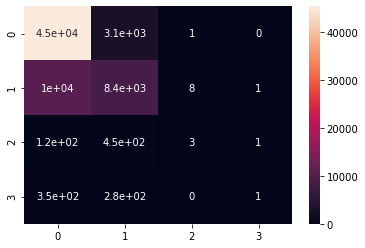

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.94      0.87     48537
           2       0.69      0.45      0.54     18767
           3       0.25      0.01      0.01       576
           4       0.33      0.00      0.00       629

    accuracy                           0.79     68509
   macro avg       0.52      0.35      0.36     68509
weighted avg       0.77      0.79      0.76     68509



### SVC

In [53]:
#vc = SVC()

In [54]:
#svc.fit(X_train,y_train)

In [55]:
#cross_val_score(svc, X_train, y_train, cv=5)

In [56]:
#y_svc = svc.predict(X_test)

In [57]:
#svc.score(X_test, y_test)

In [58]:
#cm = confusion_matrix(y_test, y_svc)
#sns.heatmap(cm, annot=True)

### Dessiccion Classifier

In [59]:
dt = DecisionTreeClassifier(min_samples_split=10)

In [60]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

In [61]:
y_dt = dt.predict(X_test)

In [62]:
dt.score(X_test, y_test)

0.705177421944562

 0 Ilesos
 1 Herido Eva
 2 Herido Hospitalizado
 3 Muerto

<AxesSubplot:>

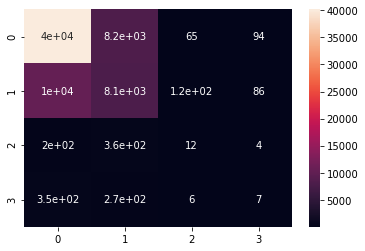

In [63]:
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True)

In [64]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           1       0.79      0.83      0.81     48537
           2       0.48      0.43      0.45     18767
           3       0.06      0.02      0.03       576
           4       0.04      0.01      0.02       629

    accuracy                           0.71     68509
   macro avg       0.34      0.32      0.33     68509
weighted avg       0.69      0.71      0.70     68509



In [179]:
X_train.columns

Index(['DIA_PROCESADO', 'EDAD_PROCESADA', 'LLEVACINTURON', 'LLEVACHALECO',
       'LLEVACASCO', 'SEXO', 'MODELOVEHICULO', 'CLASEVEHICULO',
       'POSSESEGURORESPONSABILIDAD', 'CON_EMBRIAGUEZ', 'LOCALIDAD',
       'HORA_PROCESADA', 'MES'],
      dtype='object')

In [181]:
# Recolectamos los valores que se van a predecir
# ['DIA_PROCESADO', 'EDAD_PROCESADA', 'LLEVACINTURON', 'LLEVACHALECO','LLEVACASCO', 'SEXO', 'MODELOVEHICULO', 'CLASEVEHICULO',
#  'POSSESEGURORESPONSABILIDAD', 'CON_EMBRIAGUEZ', 'LOCALIDAD','HORA_PROCESADA', 'MES']
valores = np.array([2,   # DIA_PROCESADO
                    28,   # EDAD_PROCESADA
                    2,    # LLEVACINTURON
                    1,    # LLEVACHALECO
                    1,    # LLEVACASCO
                    2,    # SEXO
                    2017, # MODELOVEHICULO
                    1,    # CLASEVEHICULO
                    2,    # POSSESEGURORESPONSABILIDAD
                    1,    # CON_EMBRIAGUEZ
                    3,    # LOCALIDAD
                    5,    # HORA_PROCESADA
                    12])   #MES

resultRM = clf.predict([valores])
resultDT = dt.predict([valores])
print(f'Resultados en RM {resultRM} y DT {resultDT}')

Resultados en RM [2] y DT [1]


In [178]:
for i in range(1,8):
    valores = np.array([i,   # DIA_PROCESADO
                        25,   # EDAD_PROCESADA
                        1,    # LLEVACINTURON
                        2,    # LLEVACHALECO
                        2,    # LLEVACASCO
                        1,    # SEXO
                        2005, # MODELOVEHICULO
                        1,    # CLASEVEHICULO
                        1,    # POSSESEGURORESPONSABILIDAD
                        2,    # CON_EMBRIAGUEZ
                        5,    # LOCALIDAD
                        13,    # HORA_PROCESADA
                        3])   #MES

    resultRM = clf.predict([valores])
    resultDT = dt.predict([valores])
    print(f'Resultados en RM {resultRM} y DT {resultDT} dia {i}')

Resultados en RM [1] y DT [1] dia 1
Resultados en RM [2] y DT [1] dia 2
Resultados en RM [2] y DT [1] dia 3
Resultados en RM [1] y DT [1] dia 4
Resultados en RM [1] y DT [1] dia 5
Resultados en RM [1] y DT [1] dia 6
Resultados en RM [1] y DT [1] dia 7


### Exportar modelo Dessiccion Classifier .pickle

In [ ]:
filename = 'finalized_Dessiccion_Classifier.pickle'
pickle.dump(dt, open(filename, 'wb'))

### Exportar modelo RandomForest Classifier .pickle

In [ ]:
filename = 'finalized_RandomForestClassifier.pickle'
pickle.dump(clf, open(filename, 'wb'))